<a href="https://colab.research.google.com/github/Aureldns14/GitConcepts/blob/main/Stage2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red'>**MACHINE LEARNING PROJECT**</font>


Aurélie Doëns, Julie Castagnon, Elinor Dupin, Emilie Brimont

## **Google vs. Nvidia benchmarking: Determining which company is most likely to deliver a 20% return over 5 years.**


# <font color='#FF8C00'>**1. IMPLEMENTATION AND DATA EXPLORATION**</font>


# <font color='darkred'>Importation of all the libraries needed</font>

In [37]:
#//Importation of all the library we will need in our project

#!pip install yfinance
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install statsmodels
#!pip install scipy
#!pip install seaborn
#!pip install scikit-learn
#!pip install tensorflow
#!pip install pmdarima
#!pip install prophet

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from pmdarima import auto_arima
from prophet import Prophet

In [38]:
#//Definition of the period (5 years)

end_date = datetime.today()
start_date = end_date - timedelta(days = 5*365)

#####**Why 5 years ? Because we want to capture long term trends, reducing noise and increasing robustness while keeping it revelant to current market dynamics by avoiding outdated market sentiment and investor behavior**

# <font color='darkred'>Importation of the data</font>

In [39]:
#//Importation of GOOGLE data (stock prices)

ticker = "GOOGL"
google_data = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
google_data = google_data[['Open', 'Close', 'Volume']]
google_data.columns = ['Google Open', 'Google Close', 'Google Volume']
google_data.index =google_data.index.tz_localize(None) #removing time zone since it is not relevant and it takes some place
#print(google_data)

[*********************100%***********************]  1 of 1 completed


In [40]:
#//Importation of NVIDIA data (stock prices)
ticker = "NVDA"
nvidia_data = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
nvidia_data = nvidia_data[['Open', 'Close', 'Volume']]
nvidia_data.columns = ['Nvidia Open', 'Nvidia Close', 'Nvidia Volume']
nvidia_data.index = nvidia_data.index.tz_localize(None)
#print(nvidia_data)

[*********************100%***********************]  1 of 1 completed


# <font color='darkred'>Exploration of the data</font>

In [41]:
#//Understanding the data

def dataset_info(df):
    print("---- Dataset Information ----\n")

#visualization of column names
    print("Column names:")
    print(df.columns.tolist())
    print("\n")

#checking for zero values
    print("Null values per column:")
    print(df.isnull().sum())
    print("\n")

#checking that the time interval is correct
    print(f"Time range :")
    min_date = df.index.min().date()
    max_date = df.index.max().date()
    print(f"From {min_date} to {max_date}")
    print("\n")

#number of entities and memory used
    print("Number of rows and columns:")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print("\n")

    print("Memory usage:")
    print(f"Total memory used: {df.memory_usage(deep=True).sum() / 1024 ** 2:.2f} MB")

In [42]:
dataset_info(google_data)

---- Dataset Information ----

Column names:
['Google Open', 'Google Close', 'Google Volume']


Null values per column:
Google Open      0
Google Close     0
Google Volume    0
dtype: int64


Time range :
From 2019-12-02 to 2024-11-27


Number of rows and columns:
Rows: 1257, Columns: 3


Memory usage:
Total memory used: 0.04 MB


In [43]:
dataset_info(nvidia_data)

---- Dataset Information ----

Column names:
['Nvidia Open', 'Nvidia Close', 'Nvidia Volume']


Null values per column:
Nvidia Open      0
Nvidia Close     0
Nvidia Volume    0
dtype: int64


Time range :
From 2019-12-02 to 2024-11-27


Number of rows and columns:
Rows: 1257, Columns: 3


Memory usage:
Total memory used: 0.04 MB


# <font color='darkred'>Vizualisation of the data</font>

**Here, we have verified that all the data is clean and that the time interval we established has been correctly followed.**


In [44]:
#//Merging of the stock option data
combined_data_stock = google_data.merge(nvidia_data, left_index = True, right_index = True)
print(combined_data_stock.head(5))

            Google Open  Google Close  Google Volume  Nvidia Open  \
Date                                                                
2019-12-02    65.127998     64.443001       26538000      5.41150   
2019-12-03    63.932999     64.737000       25270000      5.04675   
2019-12-04    65.305000     65.946999       35506000      5.27550   
2019-12-05    66.349998     66.348000       24408000      5.25750   
2019-12-06    66.637497     66.969498       32968000      5.28800   

            Nvidia Close  Nvidia Volume  
Date                                     
2019-12-02       5.23125      372036000  
2019-12-03       5.19150      465232000  
2019-12-04       5.23550      273424000  
2019-12-05       5.21850      184884000  
2019-12-06       5.30425      232236000  


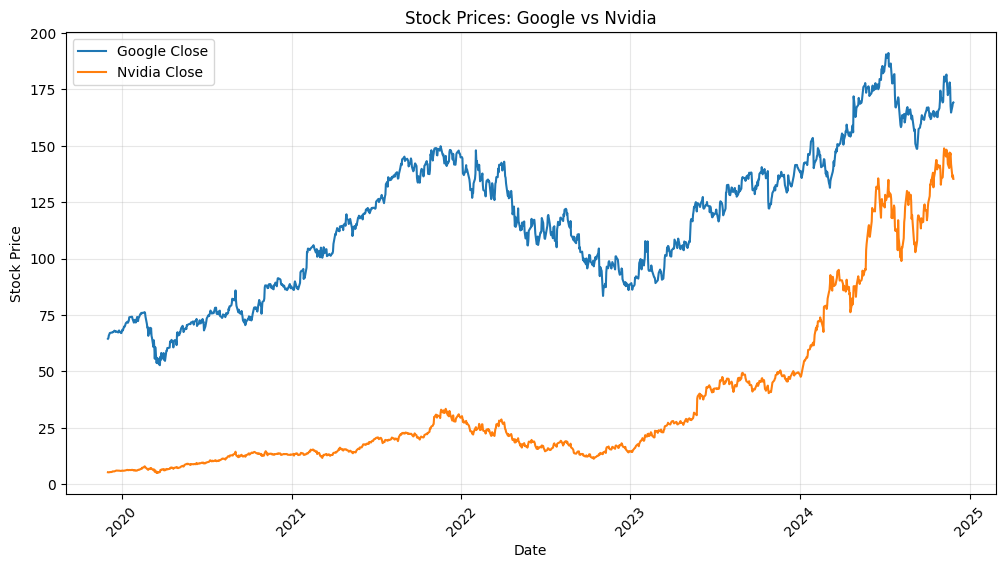

In [45]:
#//Visualization of stock prices evolution

plt.figure(figsize=(12, 6)) #creation of the figure

#plotting close data
plt.plot(combined_data_stock.index, combined_data_stock['Google Close'], label='Google Close')
plt.plot(combined_data_stock.index, combined_data_stock['Nvidia Close'], label='Nvidia Close')

#adding the title, labels and legend
plt.title('Stock Prices: Google vs Nvidia')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

#adding aesthetic details
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

**For these two companies, an upward trend has been observed since 2023. It is therefore relevant to ask which one will reach a 20% return first. On the other hand, this initial visualization shows that the two companies have very different trends. Indeed, Google has a fairly stable evolution that appears periodic, whereas Nvidia's trend resembles an exponential function. Based on this initial analysis, Google's volatility seems lower than Nvidia's, which exhibits larger variations. We will verify this further in the next steps.**

# <font color='#FF8C00'>**2. EVALUATION OF DATA PREDICTABILITY**</font>


# <font color='darkred'>Analysis of the distribution of daily returns</font>

In [46]:
#//Calculation of daily returns and addind of corresponding columns to our dataset
combined_data_stock['Google Daily Return'] = combined_data_stock['Google Close'].pct_change()
combined_data_stock['Nvidia Daily Return'] = combined_data_stock['Nvidia Close'].pct_change()
google_returns = combined_data_stock['Google Daily Return'].dropna()
nvidia_returns = combined_data_stock['Nvidia Daily Return'].dropna()

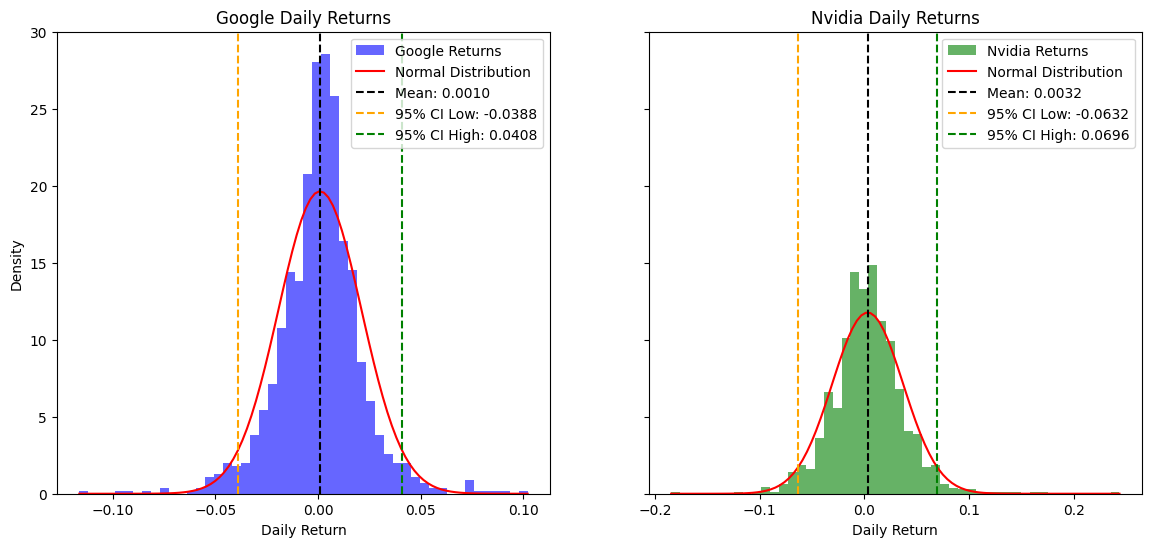

In [47]:
#//Creation of the 2 histograms side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

#Setting of the Google histogram
axes[0].hist(google_returns, bins=50, density=True, alpha=0.6, color='blue', label='Google Returns')
mean_google, std_google = google_returns.mean(), google_returns.std()
x_google = np.linspace(google_returns.min(), google_returns.max(), 100)
axes[0].plot(x_google, norm.pdf(x_google, mean_google, std_google), color='red', label='Normal Distribution')

#calculation and setting of the 95% confidence interval
google_interval_low = mean_google - 1.96 * std_google
google_interval_high = mean_google + 1.96 * std_google
axes[0].axvline(mean_google, color='black', linestyle='dashed', label=f'Mean: {mean_google:.4f}')
axes[0].axvline(google_interval_low, color='orange', linestyle='dashed', label=f'95% CI Low: {google_interval_low:.4f}')
axes[0].axvline(google_interval_high, color='green', linestyle='dashed', label=f'95% CI High: {google_interval_high:.4f}')

axes[0].set_title('Google Daily Returns')
axes[0].set_xlabel('Daily Return')
axes[0].set_ylabel('Density')
axes[0].legend()

#----------------------------------------------

#Setting of the Nvidia histogram
axes[1].hist(nvidia_returns, bins=50, density=True, alpha=0.6, color='green', label='Nvidia Returns')
mean_nvidia, std_nvidia = nvidia_returns.mean(), nvidia_returns.std()
x_nvidia = np.linspace(nvidia_returns.min(), nvidia_returns.max(), 100)
axes[1].plot(x_nvidia, norm.pdf(x_nvidia, mean_nvidia, std_nvidia), color='red', label='Normal Distribution')

#calculation and setting of the 95% confidence interval
nvidia_interval_low = mean_nvidia - 1.96 * std_nvidia
nvidia_interval_high = mean_nvidia + 1.96 * std_nvidia
axes[1].axvline(mean_nvidia, color='black', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_nvidia:.4f}')
axes[1].axvline(nvidia_interval_low, color='orange', linestyle='dashed', label=f'95% CI Low: {nvidia_interval_low:.4f}')
axes[1].axvline(nvidia_interval_high, color='green', linestyle='dashed', label=f'95% CI High: {nvidia_interval_high:.4f}')

axes[1].set_title('Nvidia Daily Returns')
axes[1].set_xlabel('Daily Return')
axes[1].legend()


**The means of Google's and Nvidia's daily returns are approximately zero, and we observe through the standard normal curve that they have a symmetric distribution. This indicates a certain balance between price increases and decreases. Additionally, 95% of the values are concentrated near the center (between -0.06 and 0.07), meaning the distribution is narrow. This is a positive sign, as extreme returns are rare, reflecting limited price variation.**

# <font color='darkred'>Calculation of volatilites</font>

In [48]:
#//Volatility Calculation, since we have seen that is may be an important value

google_returns = google_data['Google Close'].pct_change().dropna()
nvidia_returns = nvidia_data['Nvidia Close'].pct_change().dropna()

google_volatility = google_returns.std()
nvidia_volatility = nvidia_returns.std()

#We will say that there is 252 trading days in a year, source = stockstotrade.com

annualized_google_volatility = google_volatility*(252**0.5)
annualized_nvidia_volatility = nvidia_volatility*(252**0.5)

print(f"Annualized Google Volatility: {annualized_google_volatility * 100} %")
print(f"Annualized Nvidia Volatility: {annualized_nvidia_volatility * 100} %")

Annualized Google Volatility: 32.22158430764953 %
Annualized Nvidia Volatility: 53.78318670999479 %


**Unsurprisingly, Nvidia's volatility is higher than Google's. Therefore, the prediction for Google will be more reliable than the one for Nvidia. Nevertheless, both volatilities are acceptable and allow us to proceed with forecasting with a good chance of success.**

# <font color='darkred'>Analysis of EMAs</font>

#####**There is two types of moving average : SMA (simple moving average) and EMA (exponential moving average). We decided to choose the EMA since it emphasis the most recent data, and since the evolution of nvidia is not linear but more exponential we find that more interessing.**

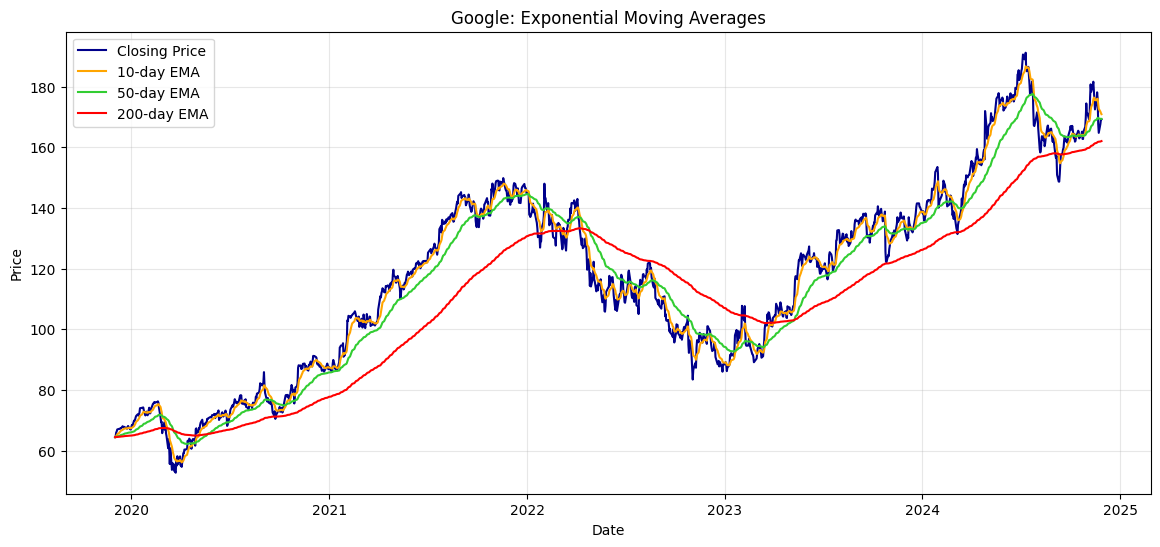

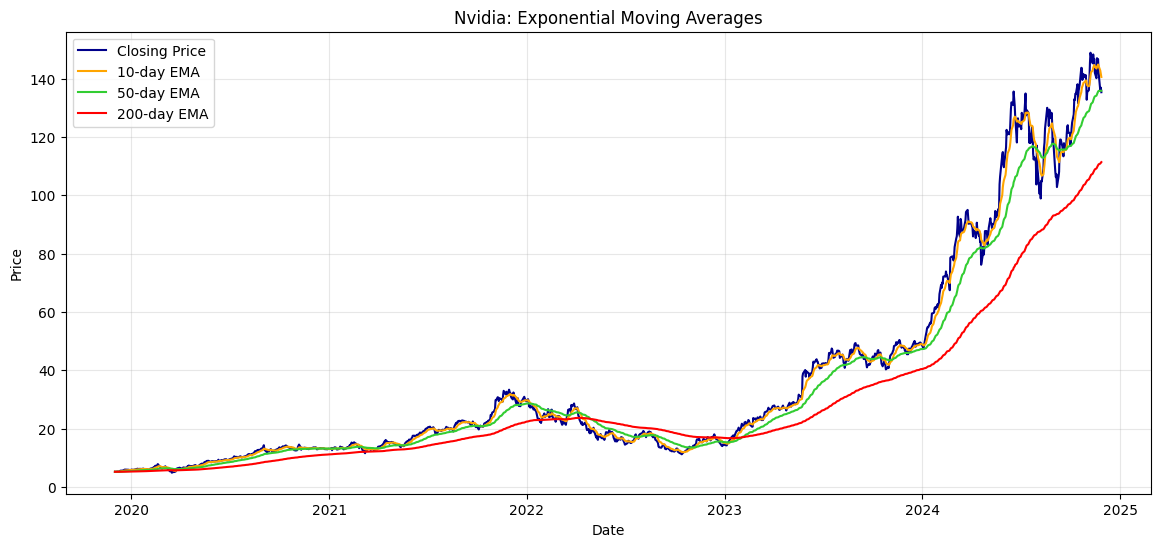

In [49]:
#//Visualization of different EMAs

#calculation of Google EMAs
google_data['10_d_avg'] = google_data['Google Close'].ewm(span=10, adjust=False).mean()
google_data['50_d_avg'] = google_data['Google Close'].ewm(span=50, adjust=False).mean()
google_data['200_d_avg'] = google_data['Google Close'].ewm(span=200, adjust=False).mean()

#calculation of Nvidia EMAs
nvidia_data['10_d_avg'] = nvidia_data['Nvidia Close'].ewm(span=10, adjust=False).mean()
nvidia_data['50_d_avg'] = nvidia_data['Nvidia Close'].ewm(span=50, adjust=False).mean()
nvidia_data['200_d_avg'] = nvidia_data['Nvidia Close'].ewm(span=200, adjust=False).mean()

#Setting and display of the Google graph
plt.figure(figsize=(14, 6))
plt.plot(google_data.index, google_data['Google Close'], label='Closing Price', color='darkblue')
plt.plot(google_data.index, google_data['10_d_avg'], label='10-day EMA', color='orange')
plt.plot(google_data.index, google_data['50_d_avg'], label='50-day EMA', color='limegreen')
plt.plot(google_data.index, google_data['200_d_avg'], label='200-day EMA', color='red')
plt.title('Google: Exponential Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(alpha=0.3)

#Setting and display of the Nvidia graph
plt.figure(figsize=(14, 6))
plt.plot(nvidia_data.index, nvidia_data['Nvidia Close'], label='Closing Price', color='darkblue')
plt.plot(nvidia_data.index, nvidia_data['10_d_avg'], label='10-day EMA', color='orange')
plt.plot(nvidia_data.index, nvidia_data['50_d_avg'], label='50-day EMA', color='limegreen')
plt.plot(nvidia_data.index, nvidia_data['200_d_avg'], label='200-day EMA', color='red')
plt.title('Nvidia: Exponential Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(alpha=0.3)


**We notice that after a significant crossover between the 50-day EMA and the 200-day EMA in 2023 (indicating a strong upward trend), these two EMAs are farther apart in the case of Nvidia. The slower EMA is therefore less effective in analyzing Nvidia's trends compared to Google's. This justifies the choice of different EMAs to smooth the data of the two companies in the next step.**

# <font color='#FF8C00'>**3. PREPARATION OF THE DATA**</font>


# <font color='darkred'>Assignment of EMAs</font>

#####**Based on the previous analysis, we assign different EMAs to Nvidia and Google. Here, we select the 50-day EMA for Nvidia and a slightly slower EMA for Google, the 100-day EMA.**

In [50]:
#//Moving Average

ema_range_google = 100 #in days
ema_range_nvidia = 50 #in days

google_ema = google_data['Google Close'].ewm(span= ema_range_google, adjust = False).mean()
nvidia_ema = nvidia_data['Nvidia Close'].ewm(span= ema_range_nvidia, adjust = False).mean()

#print(google_ema)
#print(nvidia_ema)

Text(0.5, 1.0, 'Nvidia Stock Price with 50 day EMA')

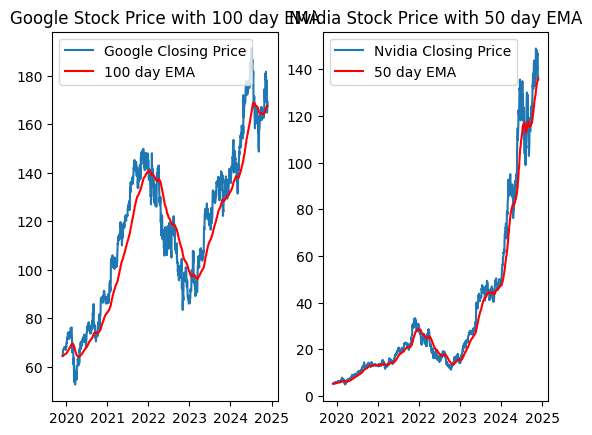

In [51]:
#//Visualization of the EMA
#Google EMA
plt.subplot(1, 2, 1)
plt.plot(google_data['Google Close'], label='Google Closing Price')
plt.plot(google_ema, label=f'{ema_range_google} day EMA', color='red')
plt.legend()
plt.title(f'Google Stock Price with {ema_range_google} day EMA')

#Nvidia EMA
plt.subplot(1, 2, 2)
plt.plot(nvidia_data['Nvidia Close'], label='Nvidia Closing Price')
plt.plot(nvidia_ema, label=f'{ema_range_nvidia} day EMA', color='red')
plt.legend()
plt.title(f'Nvidia Stock Price with {ema_range_nvidia} day EMA')

#####**Since we want to predict whether the stock price goes up or down, we will create a variable price movement : 1 if it goes up / 0 if it goes down.**

In [52]:
#//Preparation of the data

google_data['Price Movement'] = (google_data['Google Close'].shift(-1) > google_data['Google Close']).astype(int)
nvidia_data['Price Movement']=(nvidia_data['Nvidia Close'].shift(-1) > nvidia_data['Nvidia Close']).astype(int)

combined_data_stock = google_data.merge(nvidia_data, left_index=True, right_index=True, suffixes =(' Google', ' Nvidia'))
combined_data_stock = combined_data_stock.dropna()

#Integration of the volatility, the mobing average into combined_data
combined_data_stock['Google Volatility'] = google_returns.rolling(window=50).std()
combined_data_stock['Nvidia Volatility'] = nvidia_returns.rolling(window=50).std()

combined_data_stock['Google 100 days EMA'] = google_ema
combined_data_stock['Nvidia 50 days EMA'] = nvidia_ema

combined_data_stock = combined_data_stock.dropna()
print(combined_data_stock.head(5))

            Google Open  Google Close  Google Volume  10_d_avg Google  \
Date                                                                    
2020-02-13    75.500000     75.669502       22914000        74.481330   
2020-02-14    75.726501     75.936501       23198000        74.745906   
2020-02-18    75.717003     75.972000       25642000        74.968832   
2020-02-19    76.360001     76.243500       22746000        75.200590   
2020-02-20    75.950500     75.849503       25962000        75.318574   

            50_d_avg Google  200_d_avg Google  Price Movement Google  \
Date                                                                   
2020-02-13        70.966624         66.955541                      1   
2020-02-14        71.161522         67.044903                      1   
2020-02-18        71.350168         67.133730                      1   
2020-02-19        71.542063         67.224375                      0   
2020-02-20        71.710982         67.310197           

# <font color='darkred'>Analysis of the Correlation Matrix</font>

#####**Before doing a Decision Tree, we need to know the correlation between Nvidia data and Google data. If the correlation is high, we will use Nvidia data to predict Google, and vice versa.**

Text(0.5, 1.0, 'Correlation Matrix between Google and Nvidia Features')

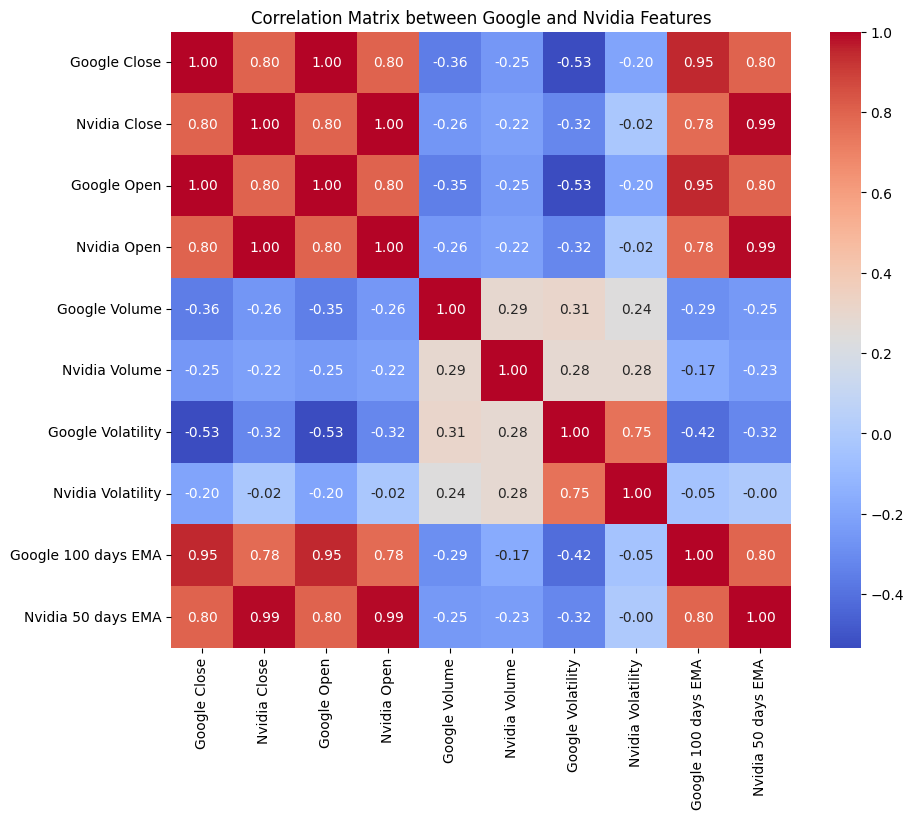

In [53]:
#//Correlation Matrix

correlation_colums = ['Google Close', 'Nvidia Close', 'Google Open', 'Nvidia Open', 'Google Volume', 'Nvidia Volume', 'Google Volatility', 'Nvidia Volatility', 'Google 100 days EMA', 'Nvidia 50 days EMA']
correlation_matrix = combined_data_stock[correlation_colums].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix between Google and Nvidia Features")

#####**So we can see that some evident data aren't correlated (ex : Google Close with Google Volume). But there is some interesting data that are correlated (ex : Nvidia Close with Google Close). So we need to keep Nvidia data for prevision for Google and vice versa.**

**We also learn from this correlation matrix that the prices of Google and Nvidia are closely linked, suggesting that their fluctuations are directly influenced by the same movements and events in the technology sector. Thus, integrating macroeconomic variables could be a way to improve the performance of our model. Furthermore, this matrix confirms that the chosen EMAs are relevant.**

# <font color='darkred'>Analysis of the Seasonality</font>


###**For Google**

<Figure size 640x480 with 0 Axes>

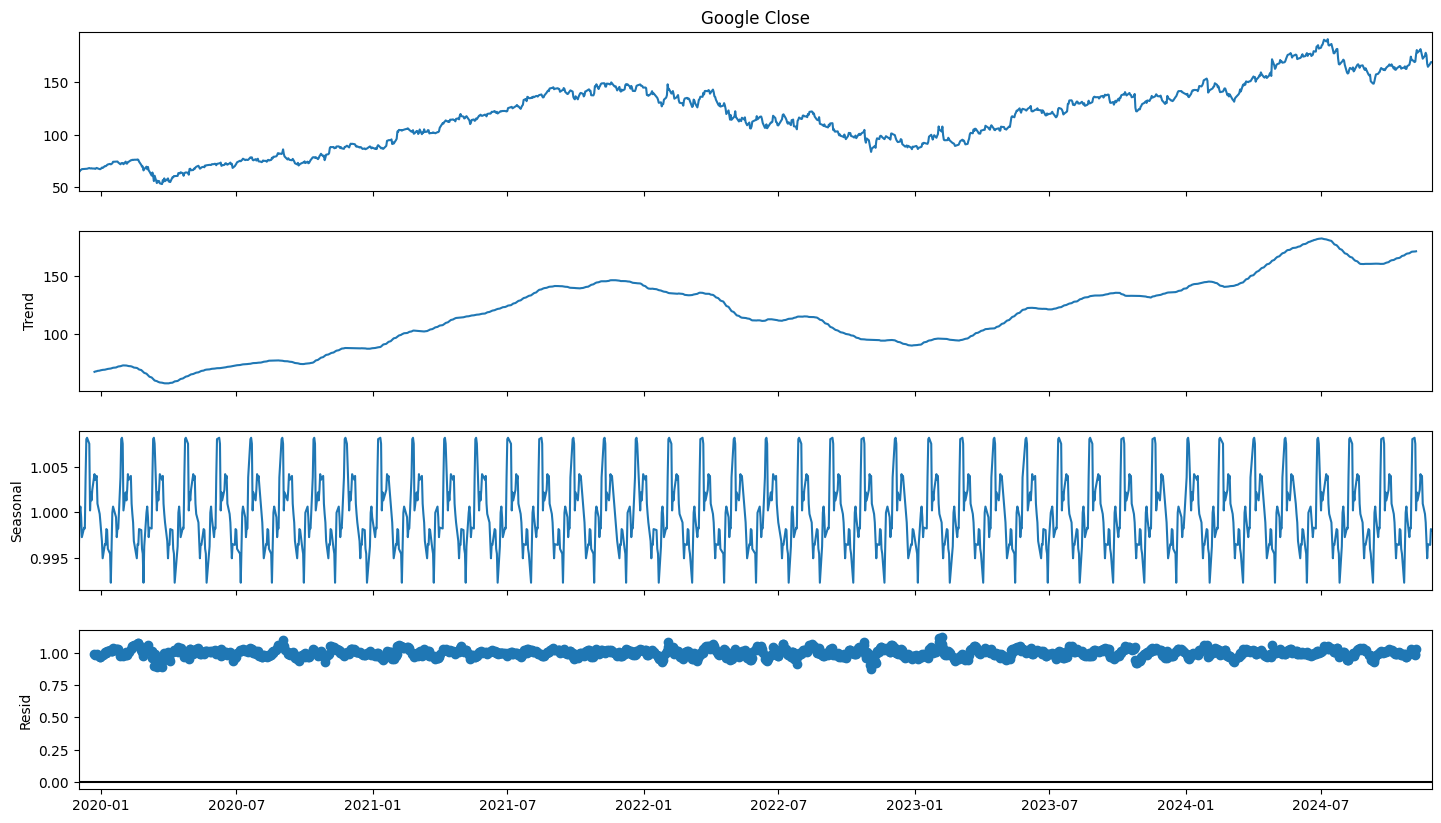

In [54]:
result = seasonal_decompose(google_data['Google Close'], model='multiplicative', period=30)

# Visualisation des composants
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)
plt.show()

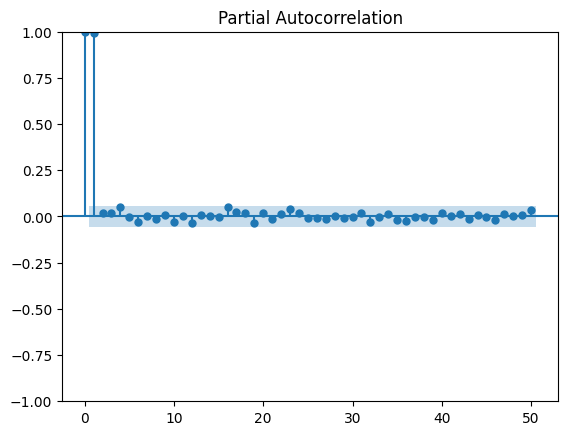

In [55]:
data=pd.to_datetime(google_data['Google Close'])
plot_pacf(data, lags=50)
plt.show()

###**For Nvidia**

<Figure size 640x480 with 0 Axes>

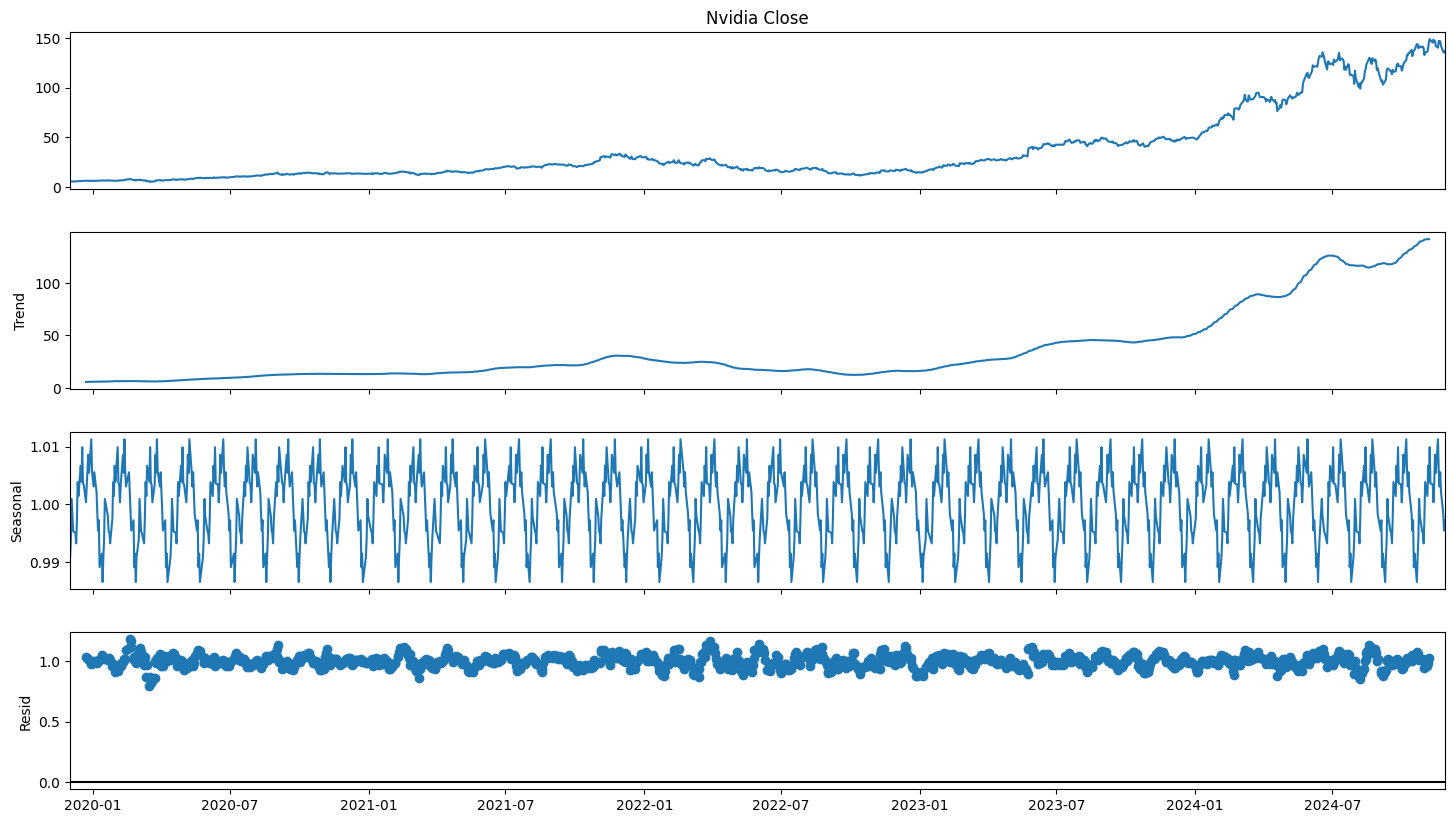

In [56]:
result = seasonal_decompose(nvidia_data['Nvidia Close'], model='multiplicative', period=30)

# Visualisation des composants
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)
plt.show()

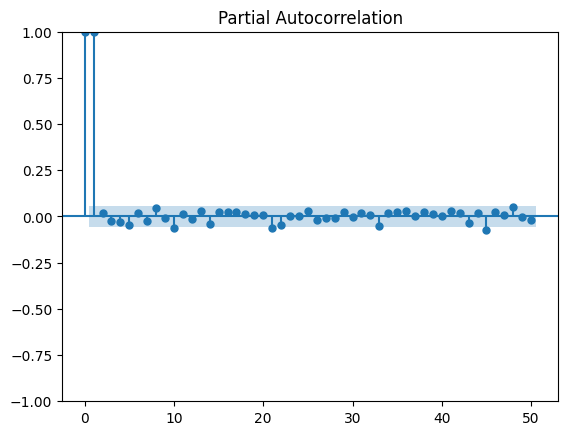

In [57]:
data=pd.to_datetime(nvidia_data['Nvidia Close'])
plot_pacf(data, lags=50)
plt.show()

**We observe in this seasonal decomposition that our data is not stationary due to the "Trend" components. Additionally, we notice clear and regular periodic patterns in the "Seasonal" components, indicating that our data is seasonal. It is important to know these two pieces of information to select appropriate algorithms later on.**

# <font color='#FF8C00'>**4. APPLICATION OF CLASSICAL PREDICTION ALGORITHMS**</font>


# <font color='darkred'>DecisionTreeClassifier</font>


In [58]:
#//Decision Tree using DecisionTreeClassifier

features = ['Google 100 days EMA', 'Nvidia 50 days EMA', 'Google Volatility', 'Nvidia Volatility']
X = combined_data_stock[features]
y_google = combined_data_stock['Price Movement Google']
y_nvidia = combined_data_stock['Price Movement Nvidia']

#So now we are spliting our data into training and testing sets
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X,y_google, test_size = 0.3, random_state = 42)
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X,y_nvidia, test_size = 0.3, random_state = 42 )


model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train_g, y_train_g)
model.fit(X_train_n, y_train_n)

y_pred_g = model.predict(X_test_g)
y_pred_n = model.predict(X_test_n)
print(f"Decision Tree Accuracy with Google price movement : {accuracy_score(y_test_g, y_pred_g):.4f}")
print(f"Decision Tree Accuracy with Nvidia price movement : {accuracy_score(y_test_n, y_pred_n):.4f}")

Decision Tree Accuracy with Google price movement : 0.4959
Decision Tree Accuracy with Nvidia price movement : 0.5014


#####**Our results mean that our model was able to predict correctly the movement of nvidia price at 51% and google's one at 53%. So our model is not the best. What about testing a new one ? We can also improve this one by adding more features.**

# <font color='darkred'>Logistic Regression</font>


In [59]:
#//Logistic Regression using sklearn

model = LogisticRegression()
model.fit(X_train_g, y_train_g)
model.fit(X_train_n, y_train_n)

y_pred_g = model.predict(X_test_g)
y_pred_n = model.predict(X_test_n)
print(f"Logistic Regression Accuracy with Google price movement : {accuracy_score(y_test_g, y_pred_g):.4f}")
print(f"Logistic Regression Accuracy with Nvidia price movement : {accuracy_score(y_test_n, y_pred_n):.4f}")

Logistic Regression Accuracy with Google price movement : 0.5675
Logistic Regression Accuracy with Nvidia price movement : 0.5344


#####**We can see that our results are slightly better, (58% with Google and 55% with Nvidia), we will need to improve it.**


# <font color='darkred'>Support Vector Machine</font>

In [60]:
#//Support Vector Machine using sklearn

model = SVC(kernel='rbf', random_state=42)
model.fit(X_train_g, y_train_g)
model.fit(X_train_n, y_train_n)

y_pred_g = model.predict(X_test_g)
y_pred_n = model.predict(X_test_n)
print(f"SVM Accuracy with Google price movement : {accuracy_score(y_test_g, y_pred_g):.4f}")
print(f"SVM Regression Accuracy with Nvidia price movement : {accuracy_score(y_test_n, y_pred_n):.4f}")

SVM Accuracy with Google price movement : 0.5923
SVM Regression Accuracy with Nvidia price movement : 0.5647


#####**Our results are still slightly better (58% for Google and 55% with Nvidia).**

# <font color='darkred'>Random Forest</font>

In [61]:
#//Random Forest using sklearn

model = RandomForestClassifier(n_estimators=100, random_state=42)

#training of the model on Google
model.fit(X_train_g, y_train_g)
y_pred_g = model.predict(X_test_g)
accuracy_g = accuracy_score(y_test_g, y_pred_g)

#training of the model on Nvidia
model.fit(X_train_n, y_train_n)
y_pred_n = model.predict(X_test_n)
accuracy_n = accuracy_score(y_test_n, y_pred_n)

#display
print(f"Random Forest Accuracy with Google price movement: {accuracy_g:.4f}")
print(f"Random Forest Accuracy with Nvidia price movement: {accuracy_n:.4f}")

Random Forest Accuracy with Google price movement: 0.5014
Random Forest Accuracy with Nvidia price movement: 0.4959


#####**We observe that Random Forest is the less adapted model for our data.**

# <font color='darkred'>LSTM</font>

###**LSTM for Google**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 275ms/step - loss: 0.1008 - val_loss: 0.0023
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 219ms/step - loss: 0.0122 - val_loss: 0.0020
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 167ms/step - loss: 0.0073 - val_loss: 0.0026
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - loss: 0.0074 - val_loss: 0.0029
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0056 - val_loss: 0.0024
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0051 - val_loss: 0.0021
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0047 - val_loss: 0.0034
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0041 - val_loss: 0.0021
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - loss: 0.0040 - val_loss: 0.0020
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0045 - val_loss: 0.0020
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0040 - val_loss: 0.0027
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - lo

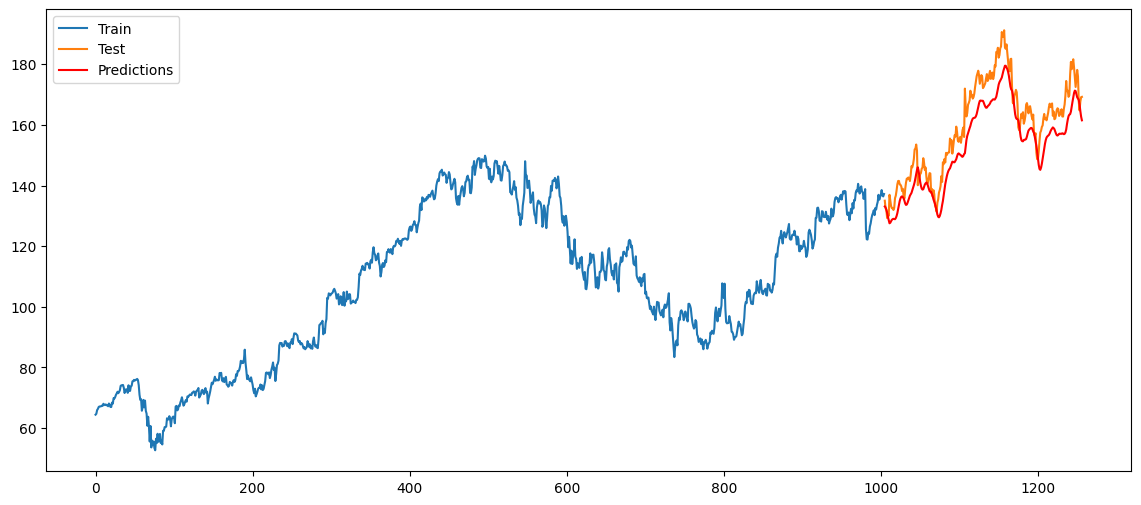

In [62]:
#//LSTM for Google

#retrieval of closing data
google_close = google_data['Google Close'].values
train_size = int(len(google_close) * 0.8)

#we split the data into train and test sections
train_data = google_close[:train_size].reshape(-1, 1)
test_data = google_close[train_size:].reshape(-1, 1)

#normalization
scaler = MinMaxScaler((0, 1))
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

#creation of sequences for LSTM
sequence_length = 60 #60 because it is the commun number used as a window in financial prediction analysis
def create_sequences(data, length):
    X, y = [], []
    for i in range(length, len(data)):
        X.append(data[i-length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_scaled, sequence_length)
X_test, y_test = create_sequences(np.concatenate((train_scaled[-sequence_length:], test_scaled)), sequence_length)

#reshape for LSTM
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

#LSTM
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

#prediction
predictions = scaler.inverse_transform(model_lstm.predict(X_test))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

#evaluation
mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100
accuracy = 100 - mape
print(f"Accuracy: {accuracy:.2f}%")

# Evaluation Metrics
mse = mean_squared_error(y_test_actual, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, predictions)
r2 = r2_score(y_test_actual, predictions)
mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100
accuracy = 100 - mape

# Display metrics
print(f"Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")
print(f"Accuracy: {accuracy:.2f}%")

#display
plt.figure(figsize=(14, 6))
plt.plot(train_data, label='Train')
plt.plot(range(train_size, len(google_close)), test_data, label='Test')
plt.plot(range(train_size, len(google_close)), predictions, c='red',label='Predictions')
plt.legend()


#####**The LSTM is a highly suitable algorithm for our problem as it accounts for the temporal dependencies present in the time series. Here, we achieve excellent results for forecasting Google.**

###**LSTM for Nvidia**

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0301 - val_loss: 0.0268
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.0032 - val_loss: 0.0044
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0019 - val_loss: 0.0063
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0017 - val_loss: 0.0030
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0013 - val_loss: 0.0036
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0015 - val_loss: 0.0052
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0013 - val_loss: 0.0050
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0014 - val_loss: 0.0047
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0012 - val_loss: 0.0059
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0012 - val_loss: 0.0043
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 9.4361e-04 - v

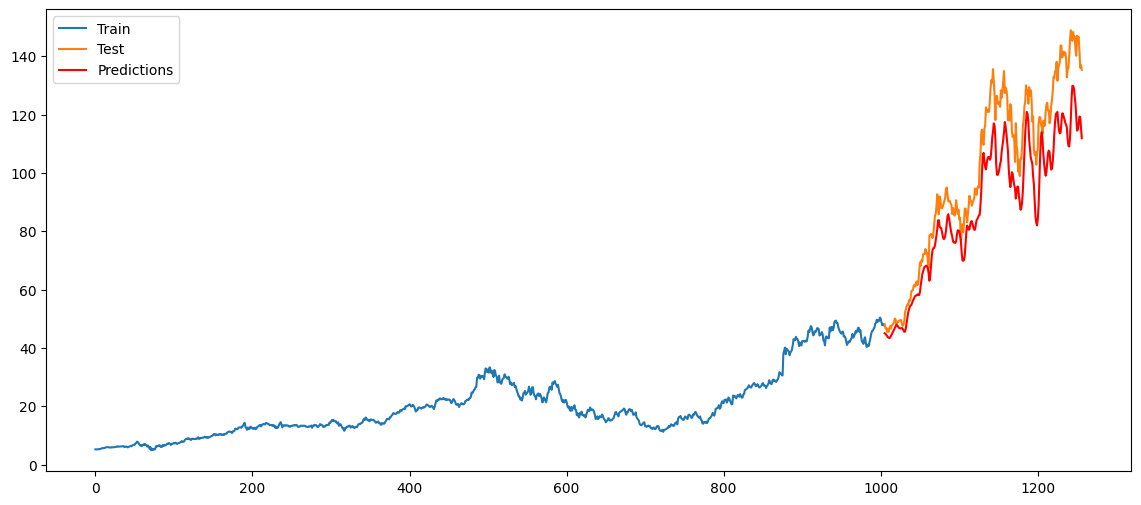

In [63]:
#retrieval of closing data
nvidia_close = nvidia_data['Nvidia Close'].values
train_size = int(len(nvidia_close) * 0.8)

#we split the data into train and test sections
train_data = nvidia_close[:train_size].reshape(-1, 1)
test_data = nvidia_close[train_size:].reshape(-1, 1)

#normalization
scaler = MinMaxScaler((0, 1))
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

#creation of sequences for LSTM
sequence_length = 60 #60 because it is the common number used as a window in financial prediction analysis
def create_sequences(data, length):
    X, y = [], []
    for i in range(length, len(data)):
        X.append(data[i-length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_scaled, sequence_length)
X_test, y_test = create_sequences(np.concatenate((train_scaled[-sequence_length:], test_scaled)), sequence_length)

#reshape for LSTM
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

#LSTM
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

#prediction
predictions = scaler.inverse_transform(model_lstm.predict(X_test))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

#evaluation
mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100
accuracy = 100 - mape
print(f"Accuracy: {accuracy:.2f}%")

#display
plt.figure(figsize=(14, 6))
plt.plot(train_data, label='Train')
plt.plot(range(train_size, len(nvidia_close)), test_data, label='Test')
plt.plot(range(train_size, len(nvidia_close)), predictions, c='red',label='Predictions')
plt.legend()


#####**In the case of Nvidia, we observe that the predictions deviate more from the actual values. We will study how to improve the results later. It might be necessary to choose a more suitable EMA or add macroeconomic data.**

**We notice that the LSTM is the most effective forecasting algorithm. Therefore, we will use it to predict stock prices for the next 5 years.**

#**STAGE 2**

In this stage of the project, we are going to test SARIMAX and Prophet in order to compare them to LSTM. We will use the model with the best results for our forecasting.

# <font color='darkred'>SARIMAX</font>

###**SARIMAX for Google**

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=6.08 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4377.545, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4378.050, Time=0.57 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4378.042, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4376.699, Time=0.04 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=4378.191, Time=0.33 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=4378.206, Time=0.41 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=4380.172, Time=1.87 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4377.360, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=4377.337, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=4376.895, Time=0.78 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 11.117 seconds
Best SARIMA model: (0, 1, 0) with seasonality (0, 0, 0, 12)
                               SARIMAX Results                                
Dep. Va

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Predictions SARIMAX vs our data')

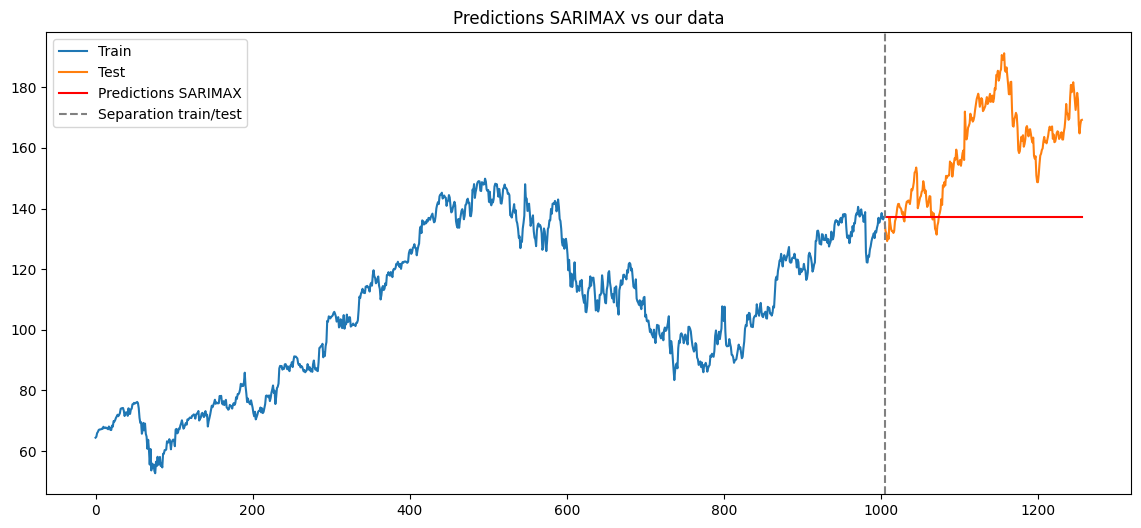

In [69]:
google_close = google_data['Google Close'].values
train_size = int(len(google_close) * 0.8)

#division between train and test
train_data = google_close[:train_size]
test_data = google_close[train_size:]

#auto-ARIMA for identify (p, d, q) and the seasonality
auto_model = auto_arima(train_data, seasonal=True, m=12, trace=True, stepwise=True, suppress_warnings=True)
print(f"Best SARIMA model: {auto_model.order} with seasonality {auto_model.seasonal_order}")
p, d, q = auto_model.order
P, D, Q, s = auto_model.seasonal_order

#training
model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarimax_result = model.fit(disp=False)
print(sarimax_result.summary())

#predictions
forecast = sarimax_result.predict(start=train_size, end=len(google_close) - 1, typ='levels')

#metrics
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, forecast)
r2 = r2_score(test_data, forecast)
mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100
accuracy = 100 - mape

#visualisation
print(f"Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")
print(f"Accuracy: {accuracy:.2f}%")

plt.figure(figsize=(14, 6))
plt.plot(train_data, label='Train')
plt.plot(range(train_size, len(google_close)), test_data, label='Test')
plt.plot(range(train_size, len(google_close)), forecast, color='red', label='Predictions SARIMAX')
plt.axvline(x=train_size, color='gray', linestyle='--', label='Separation train/test')
plt.legend()
plt.title("Predictions SARIMAX vs our data")

###**SARIMAX for Nvidia**

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=10.52 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2183.777, Time=0.16 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2187.649, Time=0.50 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2187.652, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2185.290, Time=0.06 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=2185.673, Time=0.31 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=2185.677, Time=0.43 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2187.580, Time=1.10 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2185.753, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2185.752, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2187.554, Time=0.78 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12] intercept
Total fit time: 14.790 seconds
Best SARIMA model: (0, 1, 0) with seasonality (0, 0, 0, 12)
                               SARIMAX Results                                
Dep. V

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Predictions SARIMAX vs our data')

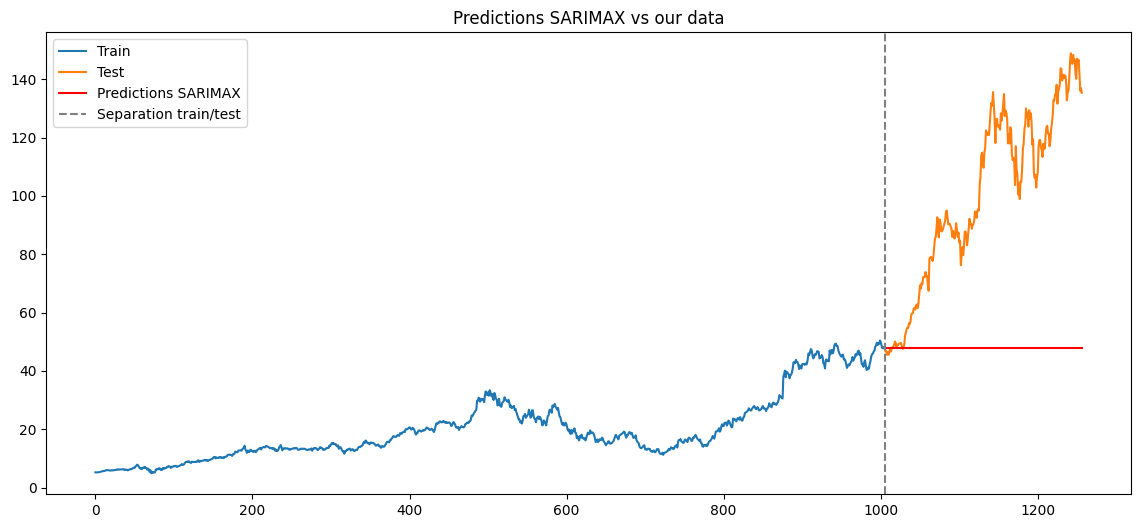

In [70]:
nvidia_close = nvidia_data['Nvidia Close'].values
train_size = int(len(nvidia_close) * 0.8)

#division between train and test
train_data = nvidia_close[:train_size]
test_data = nvidia_close[train_size:]

#auto-ARIMA for identify (p, d, q) and the seasonality
auto_model = auto_arima(train_data, seasonal=True, m=12, trace=True, stepwise=True, suppress_warnings=True)
print(f"Best SARIMA model: {auto_model.order} with seasonality {auto_model.seasonal_order}")
p, d, q = auto_model.order
P, D, Q, s = auto_model.seasonal_order

#training
model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarimax_result = model.fit(disp=False)
print(sarimax_result.summary())

#prediction
forecast = sarimax_result.predict(start=train_size, end=len(google_close) - 1, typ='levels')

#metrics
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, forecast)
r2 = r2_score(test_data, forecast)
mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100
accuracy = 100 - mape

#visualisation
print(f"Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")
print(f"Accuracy: {accuracy:.2f}%")

plt.figure(figsize=(14, 6))
plt.plot(train_data, label='Train')
plt.plot(range(train_size, len(nvidia_close)), test_data, label='Test')
plt.plot(range(train_size, len(nvidia_close)), forecast, color='red', label='Predictions SARIMAX')
plt.axvline(x=train_size, color='gray', linestyle='--', label='Separation train/test')
plt.legend()
plt.title("Predictions SARIMAX vs our data")

# <font color='darkred'>Prophet</font>

###**Prophet for Google**


DEBUG:cmdstanpy:input tempfile: /tmp/tmp3z14b1l3/66s2nrzf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3z14b1l3/12pi__48.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31971', 'data', 'file=/tmp/tmp3z14b1l3/66s2nrzf.json', 'init=/tmp/tmp3z14b1l3/12pi__48.json', 'output', 'file=/tmp/tmp3z14b1l3/prophet_model2l4q5lqc/prophet_model-20241129194441.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:44:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:44:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


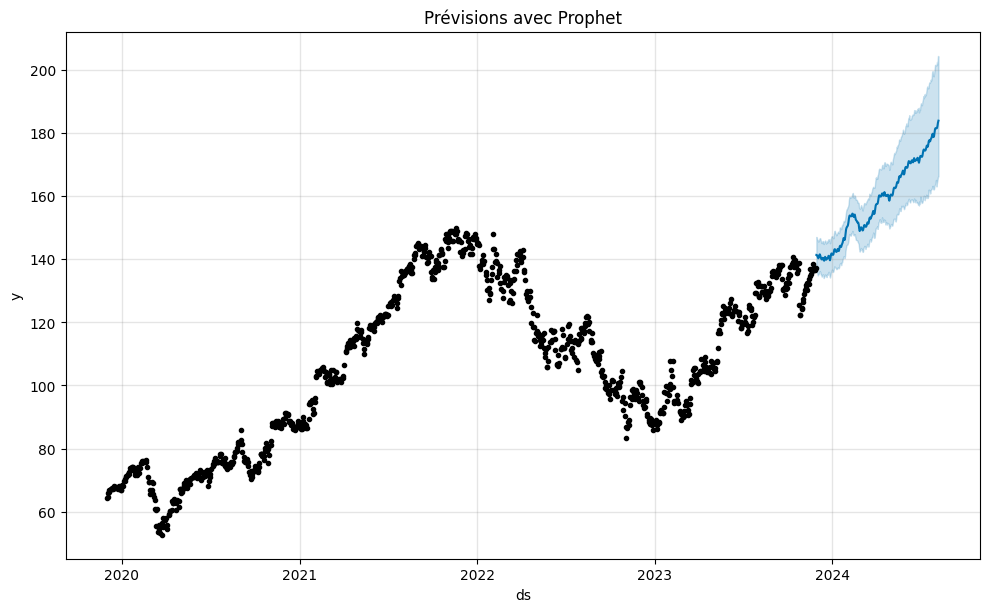

Evaluation Metrics:
Mean Squared Error (MSE): 148.7155
Root Mean Squared Error (RMSE): 12.1949
Mean Absolute Error (MAE): 9.8773
Mean Absolute Percentage Error (MAPE): 6.05%
R-squared (R²): 0.3730
Accuracy: 93.95%


Text(0.5, 1.0, 'Predictions Prophet vs our data for Google')

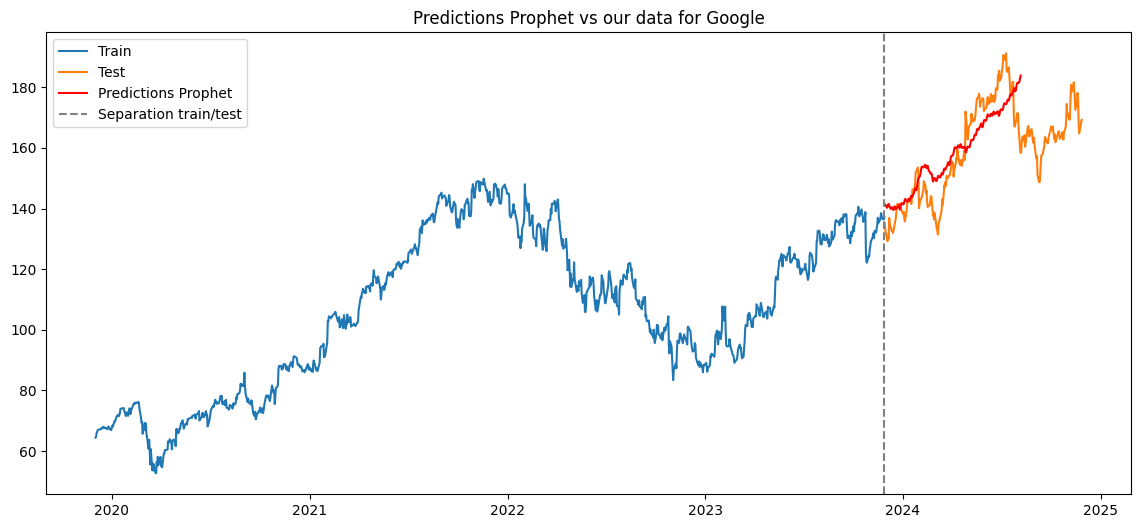

In [71]:
google_close = google_data['Google Close'].values
train_size = int(len(google_close) * 0.8)

#division between train and test
train_data = google_data.iloc[:train_size].copy()
test_data = google_data.iloc[train_size:].copy()

#transformation of the index in 'ds' (date)
train_data = train_data.reset_index()[['Date', 'Google Close']]  #'Date' is now a column
test_data = test_data.reset_index()[['Date', 'Google Close']]

train_data.rename(columns={'Date': 'ds', 'Google Close': 'y'}, inplace=True)
test_data.rename(columns={'Date': 'ds', 'Google Close': 'y'}, inplace=True)

#creation of the model Prophet
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.add_seasonality(name='monthly', period=30.5, fourier_order=8)  #30.5 days for monthly seasonality
model.fit(train_data)

#generation of a dataframe for future dates
last_date = train_data['ds'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=len(test_data)+1, freq='D')[1:]
future_data = pd.DataFrame(future_dates, columns=['ds'])
forecast = model.predict(future_data)

#visualisation
fig1 = model.plot(forecast)
plt.title("Prévisions avec Prophet")
plt.show()

#predictions
forecast_values = forecast['yhat'].values
mse = mean_squared_error(test_data['y'], forecast_values)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data['y'], forecast_values)
r2 = r2_score(test_data['y'], forecast_values)
mape = np.mean(np.abs((test_data['y'] - forecast_values) / test_data['y'])) * 100
accuracy = 100 - mape

#visualisation
print(f"Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")
print(f"Accuracy: {accuracy:.2f}%")

plt.figure(figsize=(14, 6))
plt.plot(train_data['ds'], train_data['y'], label='Train')
plt.plot(test_data['ds'], test_data['y'], label='Test')
plt.plot(future_data['ds'], forecast_values, color='red', label='Predictions Prophet')
plt.axvline(x=train_data['ds'].iloc[-1], color='gray', linestyle='--', label='Separation train/test')
plt.legend()
plt.title("Predictions Prophet vs our data for Google")

###**Prophet for Nvidia**


DEBUG:cmdstanpy:input tempfile: /tmp/tmp3z14b1l3/h5svm463.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3z14b1l3/usppc0o_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37959', 'data', 'file=/tmp/tmp3z14b1l3/h5svm463.json', 'init=/tmp/tmp3z14b1l3/usppc0o_.json', 'output', 'file=/tmp/tmp3z14b1l3/prophet_modelg_uwobfk/prophet_model-20241129194443.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:44:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:44:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


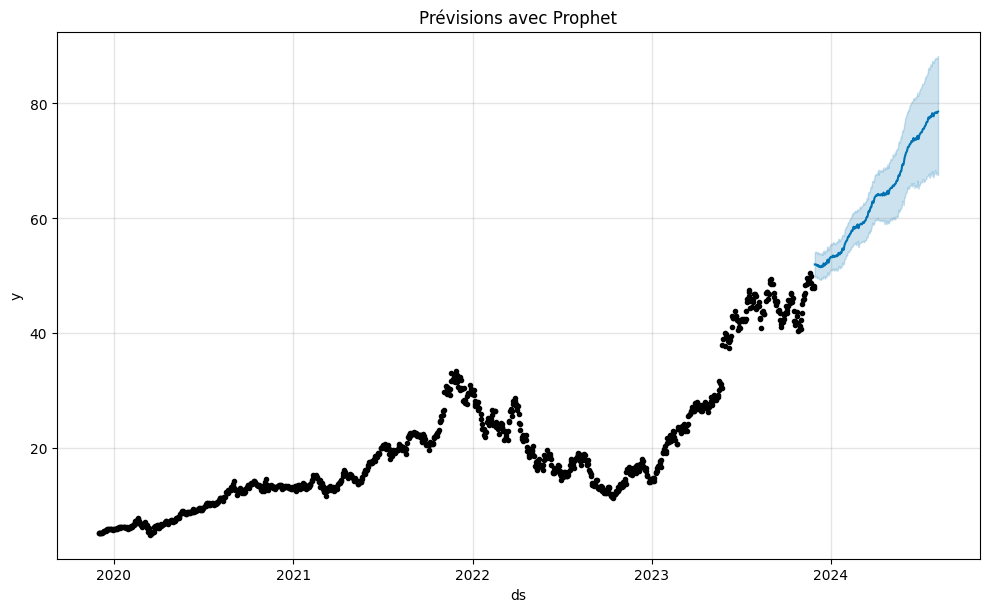

Evaluation Metrics:
Mean Squared Error (MSE): 1832.4253
Root Mean Squared Error (RMSE): 42.8068
Mean Absolute Error (MAE): 37.2855
Mean Absolute Percentage Error (MAPE): 33.48%
R-squared (R²): -1.0399
Accuracy: 66.52%


Text(0.5, 1.0, 'Predictions Prophet vs our data for Nvidia')

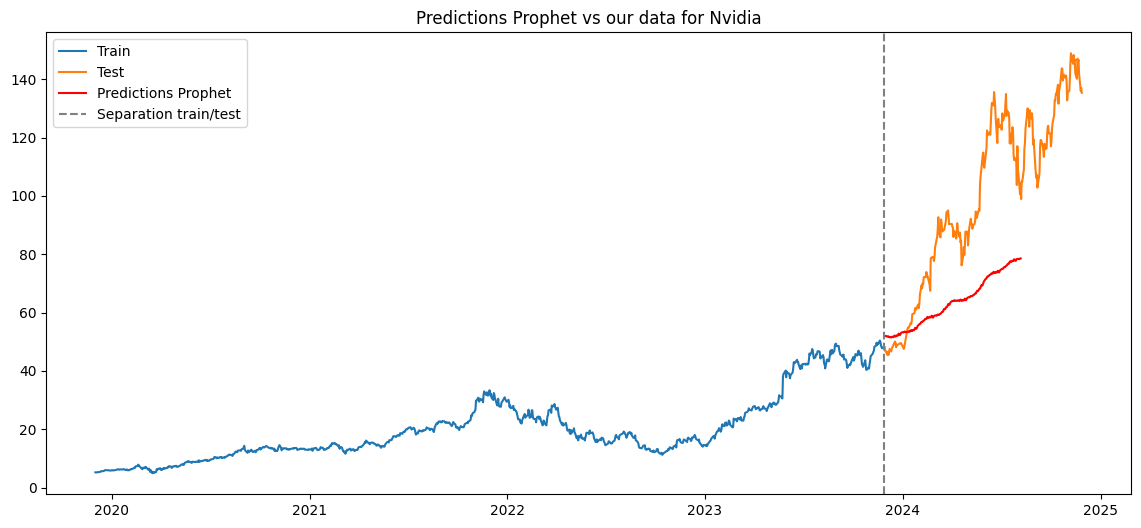

In [72]:
nvidia_close = nvidia_data['Nvidia Close'].values
train_size = int(len(nvidia_close) * 0.8)

#division between train and testt
train_data = nvidia_data.iloc[:train_size].copy()
test_data = nvidia_data.iloc[train_size:].copy()

#transformation of the index in 'ds' (date)
train_data = train_data.reset_index()[['Date', 'Nvidia Close']]
test_data = test_data.reset_index()[['Date', 'Nvidia Close']]

train_data.rename(columns={'Date': 'ds', 'Nvidia Close': 'y'}, inplace=True)
test_data.rename(columns={'Date': 'ds', 'Nvidia Close': 'y'}, inplace=True)

#creation of the model Prophet
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.add_seasonality(name='monthly', period=30.5, fourier_order=8)
model.fit(train_data)

#generation of a dataframe for future dates
last_date = train_data['ds'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=len(test_data)+1, freq='D')[1:]
future_data = pd.DataFrame(future_dates, columns=['ds'])
forecast = model.predict(future_data)

#visualisation
fig1 = model.plot(forecast)
plt.title("Prévisions avec Prophet")
plt.show()

#predictions
forecast_values = forecast['yhat'].values
mse = mean_squared_error(test_data['y'], forecast_values)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data['y'], forecast_values)
r2 = r2_score(test_data['y'], forecast_values)
mape = np.mean(np.abs((test_data['y'] - forecast_values) / test_data['y'])) * 100
accuracy = 100 - mape

#visualisation
print(f"Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")
print(f"Accuracy: {accuracy:.2f}%")

plt.figure(figsize=(14, 6))
plt.plot(train_data['ds'], train_data['y'], label='Train')
plt.plot(test_data['ds'], test_data['y'], label='Test')
plt.plot(future_data['ds'], forecast_values, color='red', label='Predictions Prophet')
plt.axvline(x=train_data['ds'].iloc[-1], color='gray', linestyle='--', label='Separation train/test')
plt.legend()
plt.title("Predictions Prophet vs our data for Nvidia")



**END**